# HOG extraction



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/'My Drive'/Code/ImagesProcessing

/content/drive/My Drive/Code/ImagesProcessing


In [3]:
ls

'Assignment5 _solution.ipynb'           img/
 BasicProcessing.ipynb                  Integral_Image.ipynb
 Binary_Images.ipynb                    IoU.ipynb
 BTT1_Oanh.ipynb                        luminance_contrast.py
 Canny.ipynb                            Moments.ipynb
 Convolution.ipynb                      PersonImages/
 Day7_Object_Detection_solution.ipynb   plot_morphology.ipynb
 Edge_detection.ipynb                   Project8_Oanh.pptx
 Filters.ipynb                          ReadImages.ipynb
 Histogram.ipynb                        res.png
 HOG-extractor.ipynb                    results/
 hog-person-svm.ipynb                   Segmentation.ipynb
 HuMoments.py                           Shape-dataset/
 ImageRetrieval.ipynb                   shapeMatcher.py
 images/                                SS_Course_Day1.ipynb
 images_test/                           Wang/
 Image_stitching.ipynb                  Week_2_Point_operations.ipynb


In [4]:
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
import cv2
import numpy as np
import sys
print(cv2.__version__)

4.1.2


Threshold

image shape: (128, 64, 4)
gray shape:  (128, 64)
gray shape: (128, 64)
gx shape: (128, 64)
gy shape: (128, 64)
gradient format: (128, 64)
theta format: (128, 64)
Kích thước ảnh gốc:  (128, 64, 4)
Kích thước bức ảnh crop theo winSize (pixel):  (64, 128)
Kích thước của 1 block (pixel):  (16, 16)
Kích thước của block stride (pixel):  (8, 8)
Kích thước lưới ô vuông (ô vuông):  (16, 8)


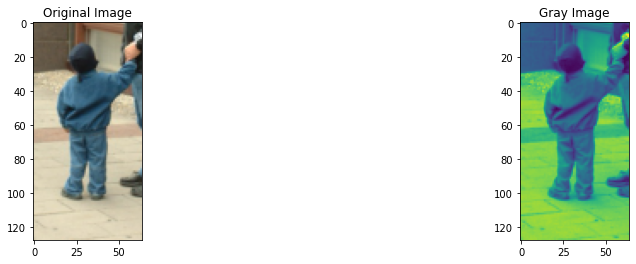

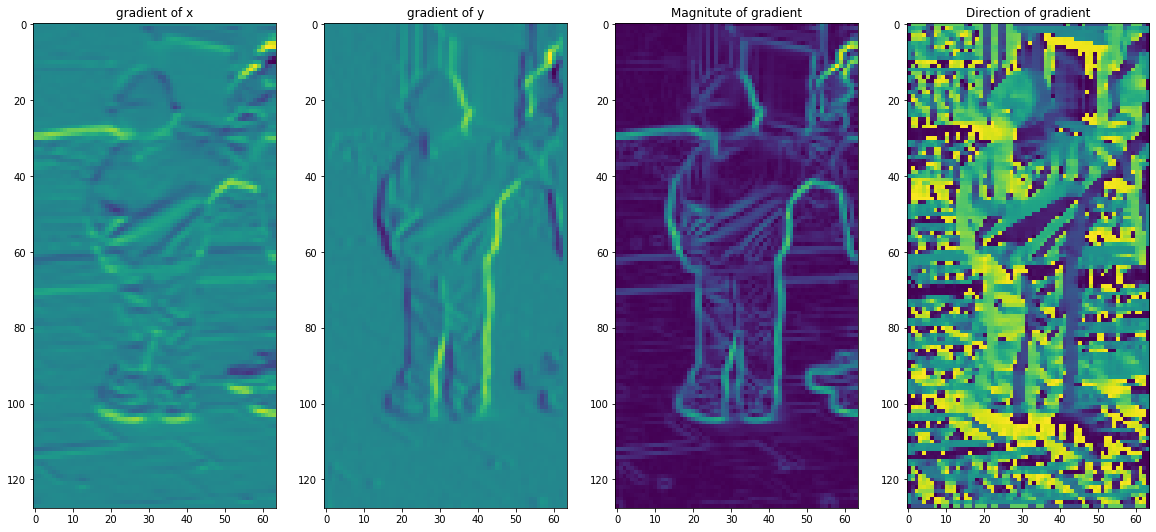

In [5]:
img = plt.imread('PersonImages/positive/person_and_bike_146d.png', cv2.IMREAD_UNCHANGED)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print('image shape:', img.shape)
print('gray shape: ', gray.shape)
plt.figure(figsize = (16, 4))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(gray)
plt.title('Gray Image')
gx = cv2.Sobel(gray, cv2.CV_32F, dx=0, dy=1, ksize=3)
gy = cv2.Sobel(gray, cv2.CV_32F, dx=1, dy=0, ksize=3)
print('gray shape: {}'.format(gray.shape))
print('gx shape: {}'.format(gx.shape))
print('gy shape: {}'.format(gy.shape))
g, theta = cv2.cartToPolar(gx, gy, angleInDegrees=True) 
print('gradient format: {}'.format(g.shape))
print('theta format: {}'.format(theta.shape))
w = 20
h = 10
plt.figure(figsize=(w, h))
plt.subplot(1, 4, 1)
plt.title('gradient of x')
plt.imshow(gx)
plt.subplot(1, 4, 2)
plt.title('gradient of y')
plt.imshow(gy)
plt.subplot(1, 4, 3)
plt.title('Magnitute of gradient')
plt.imshow(g)

plt.subplot(1, 4, 4)
plt.title('Direction of gradient')
plt.imshow(theta)
print('Kích thước ảnh gốc: ', img.shape)

# 1. Khai báo các tham số
cell_size = (8, 8)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins

# 2. Tính toán các tham số truyền vào HOGDescriptor
# winSize: Kích thước của bức ảnh được crop để chia hết cho cell size.
winSize = (img.shape[1] // cell_size[1] * cell_size[1], img.shape[0] // cell_size[0] * cell_size[0])
# blockSize: Kích thước của 1 block
blockSize = (block_size[1] * cell_size[1], block_size[0] * cell_size[0])
# blockStride: Số bước di chuyển của block khi thực hiện chuẩn hóa histogram bước 3
blockStride = (cell_size[1], cell_size[0])
print('Kích thước bức ảnh crop theo winSize (pixel): ', winSize)
print('Kích thước của 1 block (pixel): ', blockSize)
print('Kích thước của block stride (pixel): ', blockStride)

# 3. Compute HOG descriptor
hog = cv2.HOGDescriptor(_winSize=winSize,
                        _blockSize=blockSize,
                        _blockStride=blockStride,
                        _cellSize=cell_size,
                        _nbins=nbins)

# Kích thước của lưới ô vuông.
n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
print('Kích thước lưới ô vuông (ô vuông): ', n_cells)

# Reshape hog feature
#hog_feats = hog.compute(img).reshape(n_cells[1] - block_size[1] + 1,n_cells[0] - block_size[0] + 1,block_size[0], block_size[1], nbins).transpose((1, 0, 2, 3, 4)) 

#print('Kích thước hog feature (h, w, block_size_h, block_size_w, nbins): ', hog_feats.shape)

Kích thước hog features:  (3780,)
[0.18581042 0.08431077 0.09050838 ... 0.10036581 0.05749619 0.00918886]


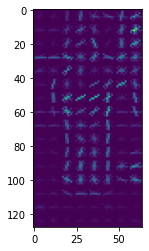

In [12]:
from skimage import exposure
from skimage import feature
import cv2
import matplotlib.pyplot as plt
 
(H, hogImage) = feature.hog(img, orientations=9, pixels_per_cell=(8, 8),
    cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2",
    visualize=True)

hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")
np.savetxt('PersonImages/person_and_bike_146d.txt', H, delimiter=' ')


# with open('PersonImages/person_and_bike_146d.txt', 'a') as file:
#   content = str(H)
#   np.savetxt('test.out', x, delimiter=',')
#   file.write(content)
#   file.close()


plt.imshow(hogImage)
print('Kích thước hog features: ', H.shape)
print (H)